📊 Customer Personality Analysis

1. IMPORT REQUIRED LIBRARIES

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

2. LOAD DATASET

In [116]:
df=pd.read_csv(r"C:\Users\Anjitha Ajayan\Downloads\archive (5)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

3. BASIC DATA UNDERSTANDINGS

In [117]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [118]:
df.shape

(1470, 35)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

4. MISSING VALUE DETECTION

In [120]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [121]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


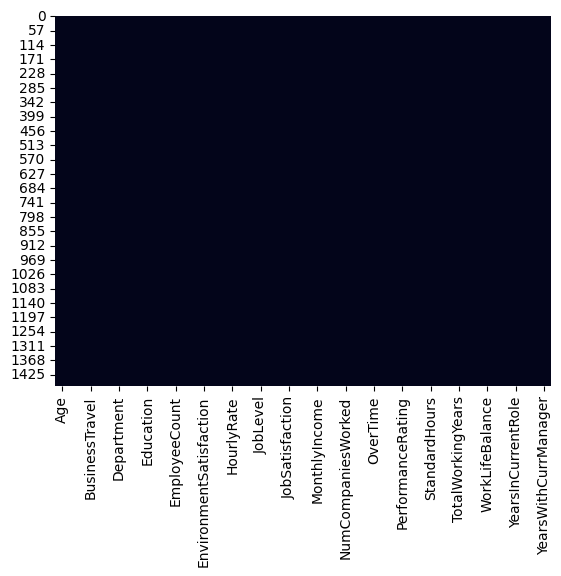

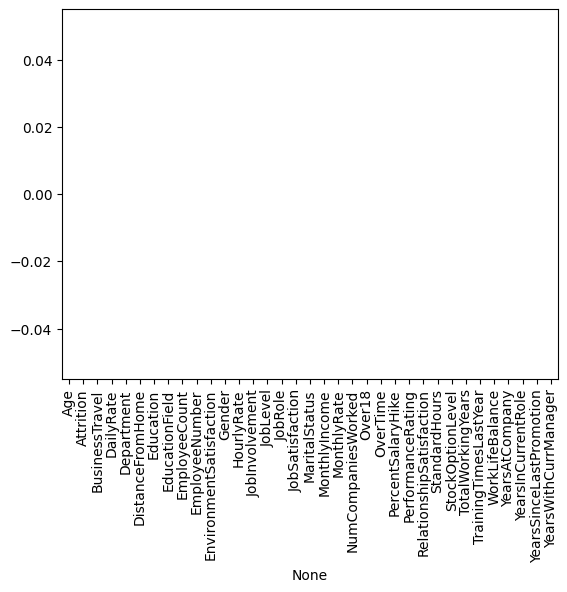

In [122]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()


missing=df.isnull().sum()
sns.barplot(x=missing.index,y=missing.values)
plt.xticks(rotation=90)
plt.show()

Here we conclude that there is no missing values present in the data . so we dont want to do any imputation techniques.

5. OUTLIER DETECTION 

In [123]:
outlier_cols = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]


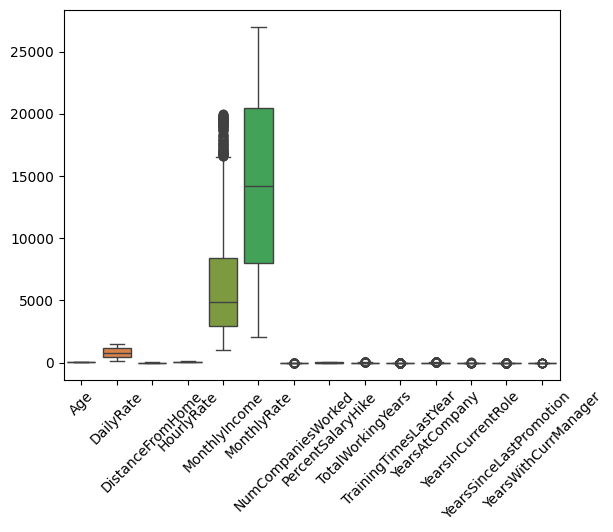

In [124]:
sns.boxplot(data=df[outlier_cols])
plt.xticks(rotation=45)
plt.show()

In [125]:
# IQR

cols=["MonthlyIncome","PercentSalaryHike",'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

mask=pd.Series(True,index=df.index)
for col in cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1

    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR

    mask=mask & (df[col]>= lower) & (df[col]<= upper)
df_clean=df[mask]

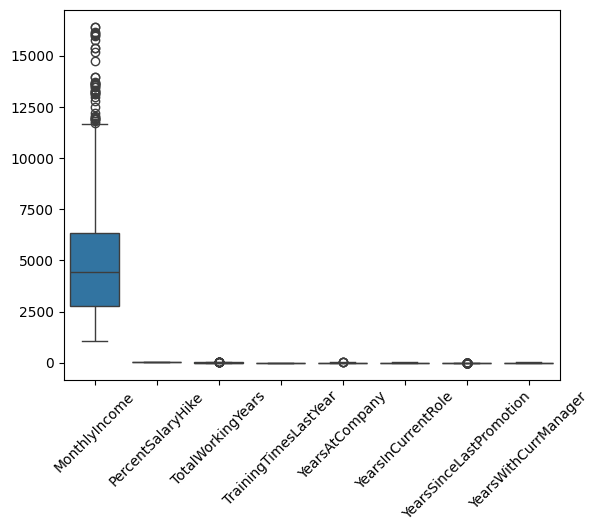

In [126]:
# again check the outliers

sns.boxplot(data=df_clean[cols])
plt.xticks(rotation=45)
plt.show()

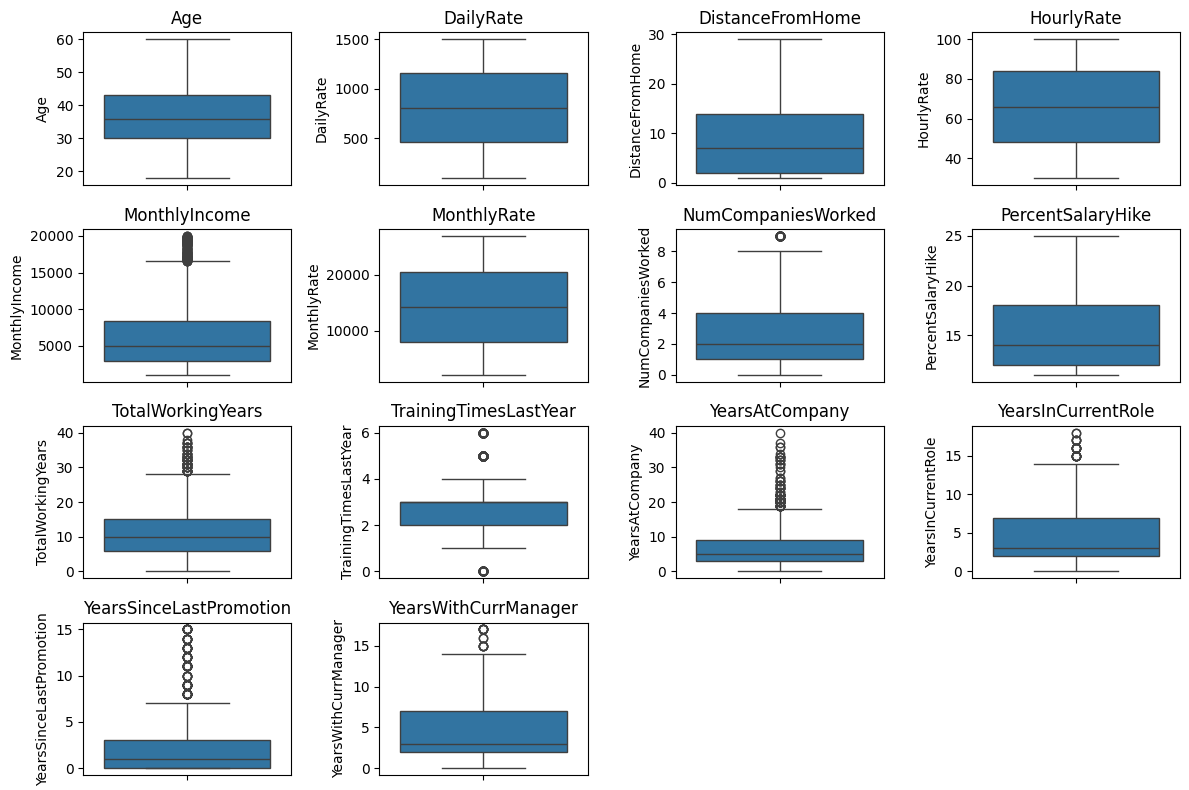

In [127]:
# for better undertanding plot boxplot for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


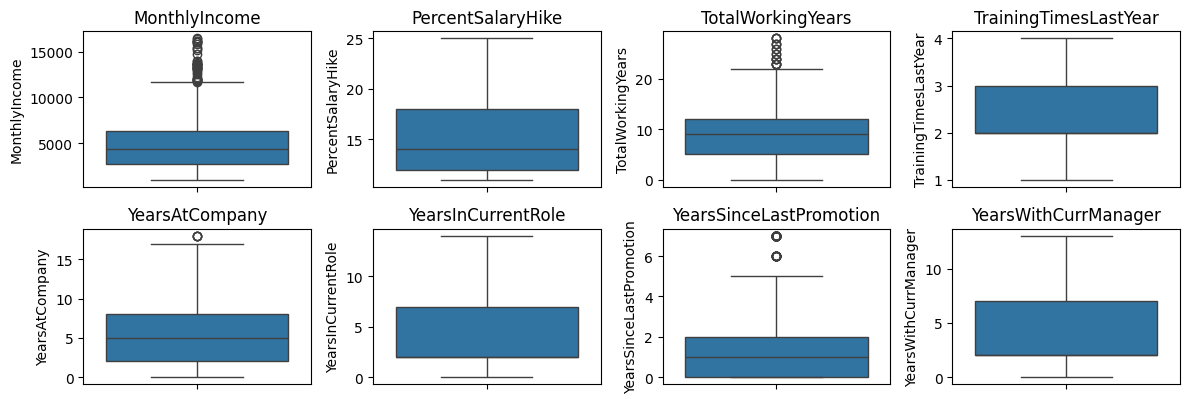

In [128]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)

plt.tight_layout()
plt.show()


6. ENCODING

In [129]:
# identify categorical and numerical variables
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.select_dtypes(exclude="object").columns


In [130]:
print("categorical columns:",cat_cols)
print("numerical columns:",num_cols)

categorical columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
numerical columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [146]:
# make a copy of the dataframe to do encoding process and drop the unwanted columns

df_encode=df_clean.copy()

df_encode=df_encode.drop(columns=["EmployeeCount","StandardHours","Over18"])


In [147]:
le=LabelEncoder()

df_encode["Attrition"]=le.fit_transform(df_encode["Attrition"])



In [148]:
df_encode["Gender"]=le.fit_transform(df_encode["Gender"])

In [149]:
df_encode.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6


In [150]:
# one hot encoding 
df_encode=pd.get_dummies(df_encode,columns=["BusinessTravel","Department","EducationField"],drop_first=True)

In [151]:
# check the all columns are converted to numerical columns
df_encode.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
1,49,0,279,8,1,2,3,1,61,2,...,7,True,False,True,False,True,False,False,False,False
2,37,1,1373,2,2,4,4,1,92,2,...,0,False,True,True,False,False,False,False,True,False
3,33,0,1392,3,4,5,4,0,56,3,...,0,True,False,True,False,True,False,False,False,False
4,27,0,591,2,1,7,1,1,40,3,...,2,False,True,True,False,False,False,True,False,False
5,32,0,1005,2,2,8,4,1,79,3,...,6,True,False,True,False,True,False,False,False,False


In [152]:
# minmax scaling

scale_cols=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

df_minmax=df_encode.copy()
minmax=MinMaxScaler()

df_minmax[scale_cols]=minmax.fit_transform(df_minmax[scale_cols])


In [153]:
df_std=df_encode.copy()
std=StandardScaler()

df_std[scale_cols]=std.fit_transform(df_std[scale_cols])

In [157]:
df_std.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.024000e+03,1024.000000,1.024000e+03,1.024000e+03,1.024000e+03,1024.000000,1.024000e+03,1024.000000,1.024000e+03,1.024000e+03,...,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03,1.024000e+03
mean,2.602085e-18,0.179688,-6.938894e-18,-3.469447e-18,-2.775558e-17,0.000000,-4.770490e-18,0.615234,-6.938894e-18,2.602085e-17,...,-3.469447e-17,-1.387779e-17,2.081668e-17,-1.734723e-18,8.673617e-18,2.081668e-17,2.081668e-17,3.295975e-17,2.428613e-17,5.204170e-18
std,1.000489e+00,0.384115,1.000489e+00,1.000489e+00,1.000489e+00,1.000489,1.000489e+00,0.486778,1.000489e+00,1.000489e+00,...,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00
min,-2.037036e+00,0.000000,-1.757325e+00,-1.022532e+00,-1.867207e+00,-1.707105,-1.593976e+00,0.000000,-1.752458e+00,-2.424846e+00,...,-4.255399e-01,-1.568686e+00,-9.351398e-01,-1.716212e+00,-2.062101e+00,-2.472542e+00,-1.460143e+00,-1.171580e+00,-7.179573e-01,-1.156141e+00
25%,-7.573989e-01,0.000000,-8.427147e-01,-8.994048e-01,-8.891918e-01,-0.883561,-6.707680e-01,0.000000,-8.732718e-01,-1.025160e+00,...,-4.255399e-01,-6.412412e-01,-9.351398e-01,-7.667788e-01,-7.179943e-01,-1.069059e+00,-9.198767e-01,-5.195703e-01,-7.179573e-01,-4.991550e-01
50%,-1.757456e-01,0.000000,-6.227191e-04,-2.837694e-01,8.882368e-02,-0.030294,2.524396e-01,1.000000,5.914666e-03,3.745253e-01,...,-4.255399e-01,2.862037e-01,2.130414e-01,-7.232013e-03,-7.179943e-01,3.344236e-01,-1.094777e-01,-5.195703e-01,-2.052737e-01,-4.991550e-01
75%,5.222383e-01,0.000000,8.908570e-01,5.781201e-01,1.066839e+00,0.899341,1.175647e+00,1.000000,8.851011e-01,3.745253e-01,...,-4.255399e-01,1.213649e+00,2.130414e-01,5.624281e-01,6.261120e-01,3.344236e-01,7.009213e-01,1.110454e+00,3.074099e-01,1.143309e+00
max,2.848852e+00,1.000000,1.731074e+00,2.425026e+00,2.044855e+00,1.704309,1.175647e+00,1.000000,1.666600e+00,1.774211e+00,...,2.349956e+00,1.213649e+00,2.509404e+00,3.600615e+00,1.970218e+00,1.737906e+00,3.402251e+00,3.392488e+00,2.870828e+00,3.114265e+00


8. VISUALIZATION BEFORE AND AFTER SCALING

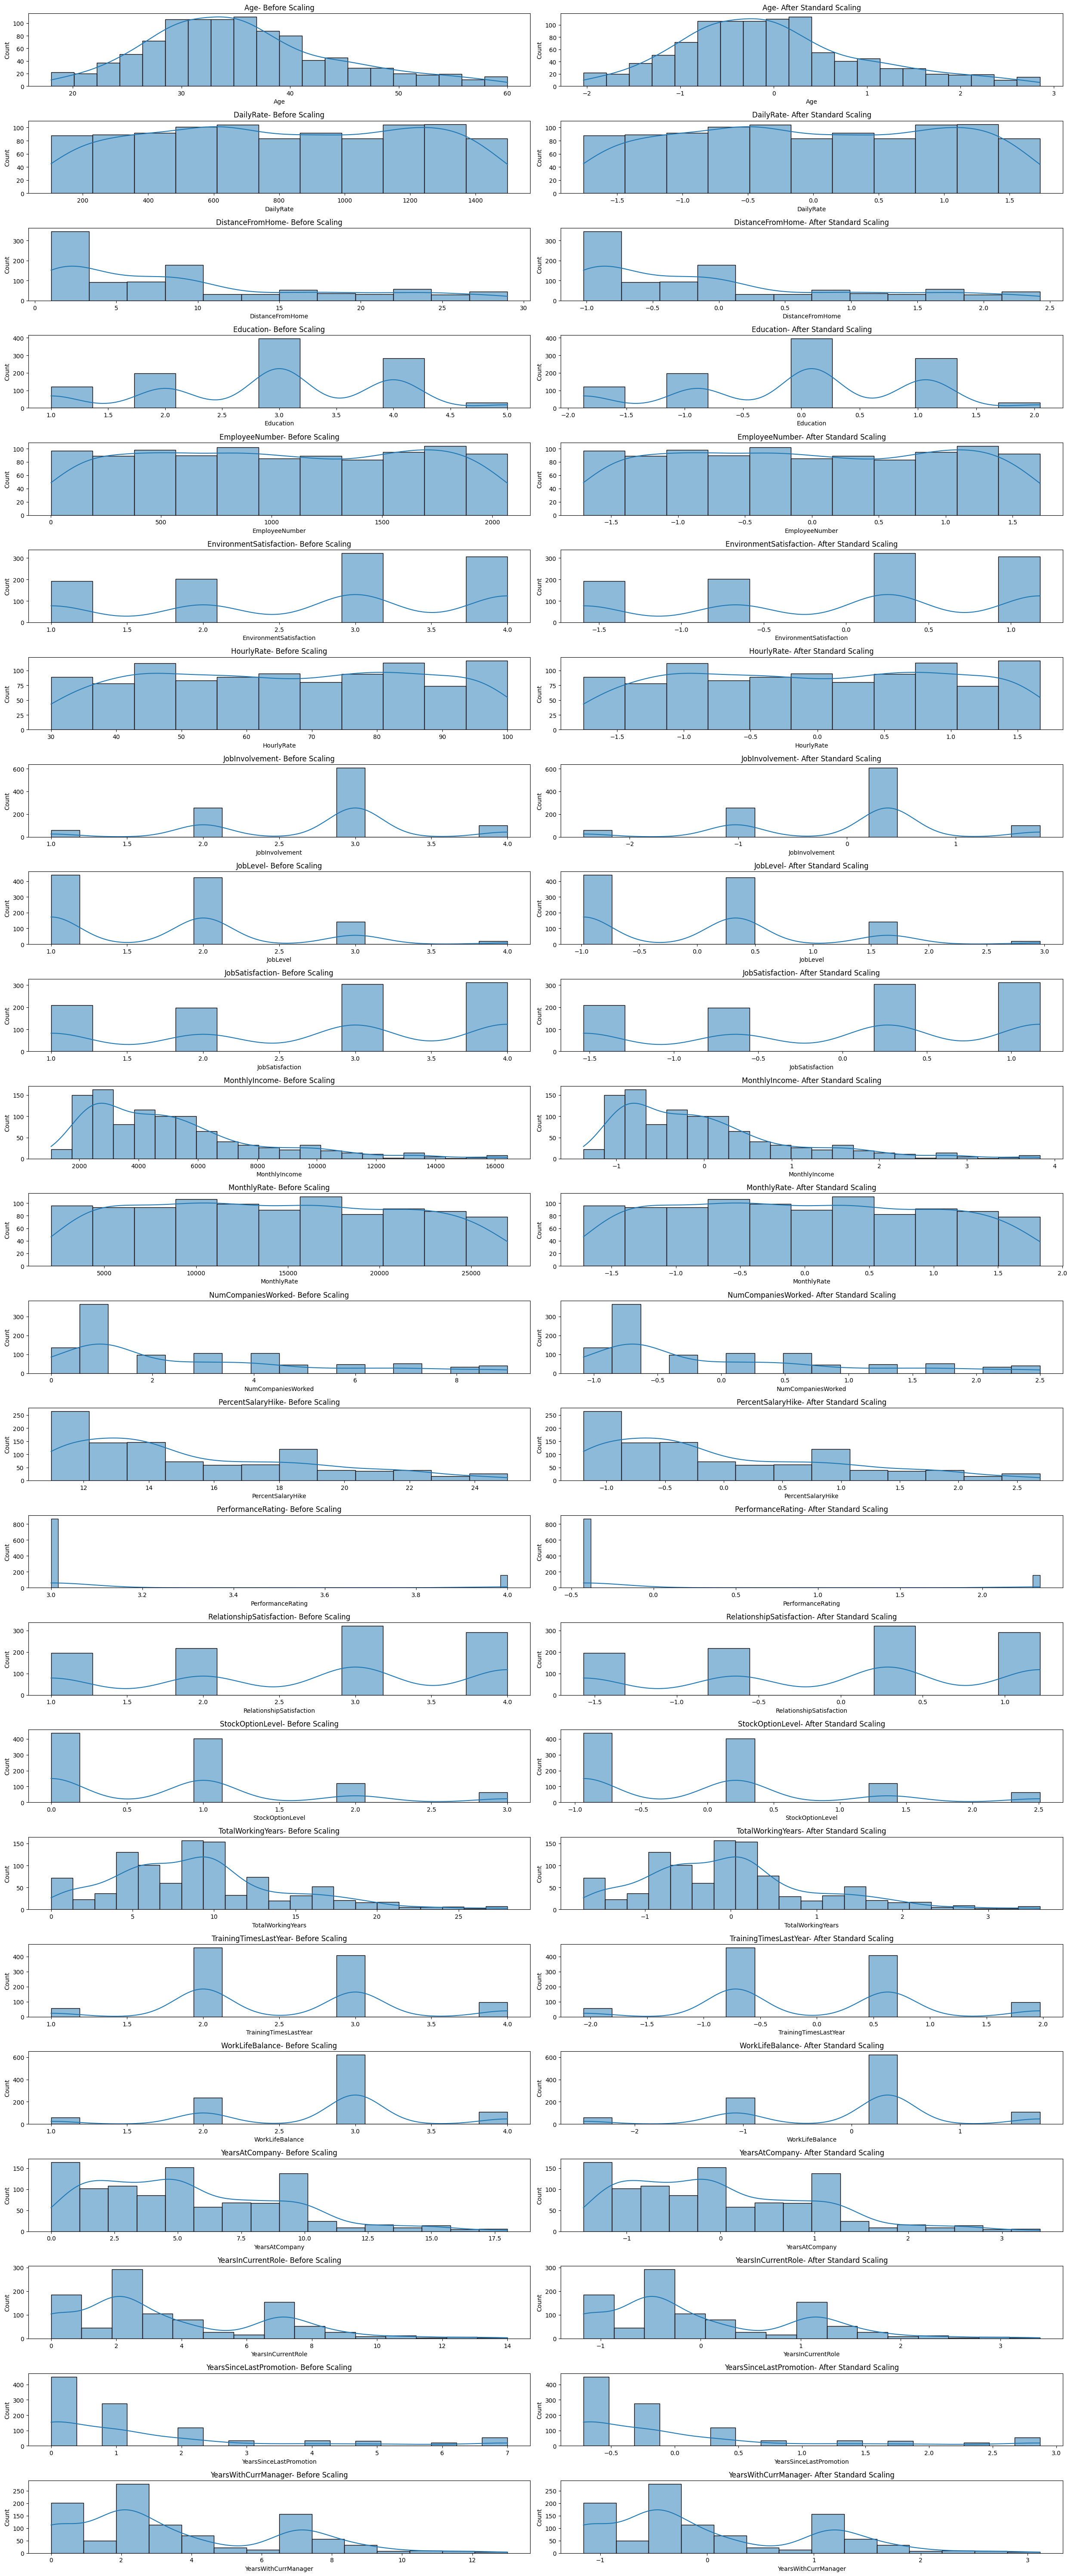

In [156]:
fig,axes=plt.subplots(24,2,figsize=(25,60))

for i,col in enumerate(scale_cols):
    sns.histplot(df_encode[col],kde=True,ax=axes[i,0])
    axes[i,0].set_title(f"{col}- Before Scaling")

    sns.histplot(df_std[col],kde=True,ax=axes[i,1])
    axes[i,1].set_title(f"{col}- After Standard Scaling")

plt.tight_layout()
plt.show()



## Conclusion

- The dataset contains no missing values, so no imputation was required.
- Several numerical features contained outliers, which were treated using the IQR method.
- Categorical variables were converted into numerical form using Label Encoding and One-Hot Encoding.
- Feature scaling was applied using Min-Max Scaling and Standardization.
- Visualizations confirmed that scaling changes the range and distribution but preserves the shape of the data.
- The dataset is now clean and ready for machine learning modeling.
